In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example is very similar to c7e2_convnet_cifar but the network is modified to use a more complex network. More context for this code example can be found in the section "Programming Example: Image Classification with a Convolutional Network" in Chapter 7 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2025-06-12 19:16:59.352369: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-12 19:16:59.400934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 19:16:59.541460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 19:16:59.672927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749781019.744434 2213845 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749781019.76

Num GPUs Available:  0


2025-06-12 19:17:06.687702: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
import sys
import numba 
import numpy

print("Python version:", sys.version)
print("Numba version:", numba.__version__)
print("Numpy version:", numpy.__version__)

Python version: 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
Numba version: 0.61.2
Numpy version: 1.26.4


In [4]:
EPOCHS = 128
BATCH_SIZE = 32

# Load dataset.
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images,
                    test_labels) = cifar_dataset.load_data()

# Standardize dataset.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev 
test_images = (test_images - mean) / stddev 
print('mean: ', mean)
print('stddev: ', stddev)

# Change labels to one-hot.
train_labels = to_categorical(train_labels, 
                              num_classes=10)
test_labels = to_categorical(test_labels, 
                             num_classes=10)

mean:  120.70756512369792
stddev:  64.1500758911213


In [5]:
# Model with 4 convolutional and 2 fully-connected layers
# using dropout and max-pooling.
# config 1
model = Sequential()
model.add(keras.Input(shape=(32, 32, 3)))
model.add(Conv2D(64, (4, 4), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same', strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile and train the model.
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics =['accuracy'])
model.summary()
history = model.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,242 (715.79 KB)

 Trainable params: 183,242 (715.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/128
1563/1563 - 98s - 63ms/step - accuracy: 0.3805 - loss: 1.6852 - val_accuracy: 0.5306 - val_loss: 1.3011
Epoch 2/128
1563/1563 - 106s - 68ms/step - accuracy: 0.5161 - loss: 1.3411 - val_accuracy: 0.5971 - val_loss: 1.1482
Epoch 3/128
1563/1563 - 101s - 64ms/step - accuracy: 0.5690 - loss: 1.2050 - val_accuracy: 0.6368 - val_loss: 1.0446
Epoch 4/128
1563/1563 - 89s - 57ms/step - accuracy: 0.6079 - loss: 1.1144 - val_accuracy: 0.6566 - val_loss: 0.9879
Epoch 5/128
1563/1563 - 88s - 57ms/step - accuracy: 0.6262 - loss: 1.0649 - val_accuracy: 0.6775 - val_loss: 0.9307
Epoch 6/128
1563/1563 - 91s - 58ms/step - accuracy: 0.6459 - loss: 1.0122 - val_accuracy: 0.6887 - val_loss: 0.9120
Epoch 7/128
1563/1563 - 96s - 61ms/step - accuracy: 0.6571 - loss: 0.9832 - val_accuracy: 0.6969 - val_loss: 0.8963
Epoch 8/128
1563/1563 - 94s - 60ms/step - accuracy: 0.6660 - loss: 0.9617 - val_accuracy: 0.6913 - val_loss: 0.8851
Epoch 9/128
1563/1563 - 88s - 56ms/step - accuracy: 0.6758 - loss: 0.9

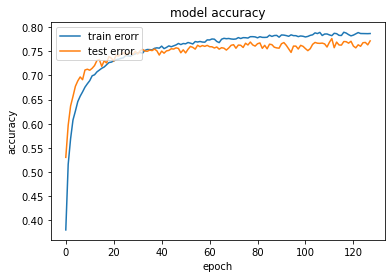

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train erorr', 'test error'], loc='upper left')
plt.show()